In [272]:
import bs4 as bs
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt

#REFERENCIAS
#https://stackoverflow.com/questions/21104592/json-to-pandas-dataframe

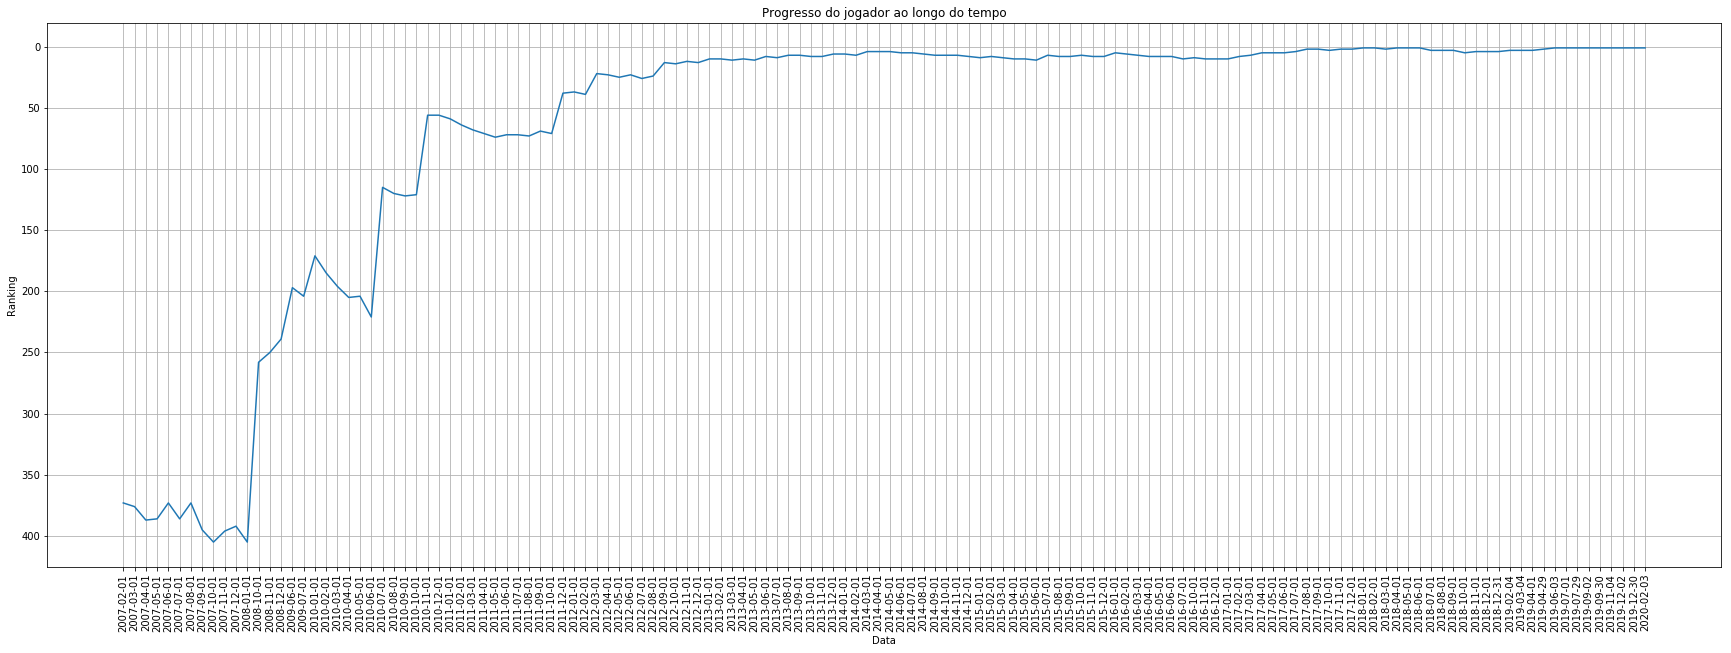

In [273]:
html_mulheres = urllib.request.urlopen('https://ranking.ittf.com/public/s/ranking/list?category=SEN&typeGender=W%3BSINGLES&year=2020&week=6&offset=0&size=100').read()
html_homens   = urllib.request.urlopen('https://ranking.ittf.com/public/s/ranking/list?category=SEN&typeGender=M%3BSINGLES&year=2020&week=6&offset=0&size=100').read()

def ranking(html, top):
    soup = bs.BeautifulSoup(html, 'lxml') # pega so o html
    soup = soup.find("p").get_text('') # pega o json dentro e tira as aspas -> <p>'json'</p>
    json_top100 = json.loads(soup)

    nome, pais, pontos, rank_atual, rank_anterior, player_id = [], [], [], [], [], []

    for elemento in json_top100['ranks']:
        rank_anterior.append(elemento['PrevRk'])
        rank_atual.append(elemento['Rk'])
        pontos.append(elemento['Points'])
        pais.append(elemento['Country']['desc'])
        nome.append(elemento['Player']['Name'])
        player_id.append(elemento['Player']['ittfId'])

    df = pd.DataFrame([rank_atual, rank_anterior, pontos, pais, nome, player_id]).T
    colunas = ['Ranking Atual','Ranking Anterior', 'Pontos', 'PaÃ­s', 'Nome', 'Id']
    df.columns = colunas
    return df.head(top)


def progresso(ittf_id, sexo): #singles
    
    url = 'https://ranking.ittf.com/public/s/ranking/progress/'+str(ittf_id)+'?category=SEN&typeGender='+str(sexo)+'%3BSINGLES'
    html = urllib.request.urlopen(url).read()
    soup = bs.BeautifulSoup(html, 'lxml') # pega so o html
    soup = soup.find("p").get_text() # pega o json dentro e tira as aspas -> <p>'json'</p>
    json_progresso = json.loads(soup)

    data, rank = [], []
    for elemento in json_progresso['ranks']:
        data.append(elemento['Date'])
        rank.append(elemento['Rk'])

    df = pd.DataFrame([data, rank]).T
    colunas = ['Data', 'Ranking']
    df.columns = colunas
    x = df['Data']
    y = df['Ranking']
    fig, ax = plt.subplots(figsize=(30, 10))
    plt.gca().invert_yaxis()
    plt.xticks(rotation=90)
    ax.plot(x, y)
    ax.set_xlabel('Data')
    ax.set_ylabel('Ranking')
    ax.set_title('Progresso do jogador ao longo do tempo')
    ax.grid(True)
    return plt.show()

progresso('112019', 'W')


In [274]:
ranking(html_mulheres, 50)

,Ranking Atual,Ranking Anterior,Pontos,PaÃ­s,Nome,Id
0,1,1,17015,China,CHEN Meng,112019
1,2,2,15460,China,SUN Yingsha,131163
2,3,3,14720,Japan,ITO Mima,117821
3,4,5,14425,China,WANG Manyu,121411
4,5,4,14400,China,LIU Shiwen,105482
5,6,7,13450,China,DING Ning,102265
6,7,6,13015,China,ZHU Yuling,117332
7,8,8,11100,Singapore,FENG Tianwei,102712
8,9,9,10950,Japan,ISHIKAWA Kasumi,110752
9,10,10,10915,Chinese Taipei,CHENG I-Ching,110797


In [275]:
ranking(html_homens, 50)

,Ranking Atual,Ranking Anterior,Pontos,PaÃ­s,Nome,Id
0,1,2,17260,China,XU Xin,110267
1,2,1,16915,China,FAN Zhendong,121404
2,3,3,16335,China,MA Long,105649
3,4,4,13915,China,LIN Gaoyuan,115910
4,5,5,12615,Japan,HARIMOTO Tomokazu,123980
5,6,6,12585,Chinese Taipei,LIN Yun-Ju,121582
6,7,7,12315,Brazil,CALDERANO Hugo,115641
7,8,8,11630,Sweden,FALCK Mattias,112074
8,9,9,11205,China,LIANG Jingkun,119588
9,10,11,11075,Germany,OVTCHAROV Dimitrij,107028
